#Import all the necessary libraries

In [3]:
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score

# Library used for data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Import dataset

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/HiYasin/flower_species_classification/main/Iris_flowers.csv")

# View data & info

## Display data and info

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Check duplicate values

In [7]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


## Check missing values

In [8]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


## Columns overview

In [9]:
df.describe(include= 'all').round(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000,150.000,150.000,150.000,150.000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500,5.843,3.054,3.759,1.199,NaN
std,43.445,0.828,0.434,1.764,0.763,NaN
min,1.000,4.300,2.000,1.000,0.100,NaN
25%,38.250,5.100,2.800,1.600,0.300,NaN
50%,75.500,5.800,3.000,4.350,1.300,NaN
75%,112.750,6.400,3.300,5.100,1.800,NaN


In [10]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Dataset overview

- The dataset consists of length and width mesurements of sepal and petal for different species in centimeter.
- There are 150 rows and 6 columns provided in the data.
- No duplicate and no Null values exist.

# Data Preprocessing

## Drop unnecessary column

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
data = data=df.iloc[:,1:]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Categorical encoding

In [13]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.Categorical(data[col]).codes

In [14]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
unique_species = data['Species'].unique()
print("Encoded Species Values:", unique_species)
# 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values: [0 1 2]


## Data scaling and splitting

In [16]:
# Scaling data
x=data.drop(columns=['Species'], axis=1)
y=data['Species']

In [17]:
# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

# Implementation

## Train and test Sequential

In [18]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [19]:
x.shape
x_train.shape[1]

4

In [20]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515 (2.01 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [23]:
cb = ModelCheckpoint('iris_flower.keras', monitor='val_accuracy', verbose=1, save_best_only=True)

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
h = model.fit(x_train, y_train, validation_split=.1, epochs=10, callbacks=[cb])

Epoch 1/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4688 - loss: 1.3810
Epoch 1: val_accuracy improved from -inf to 0.18182, saving model to iris_flower.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.3812 - loss: 1.4246 - val_accuracy: 0.1818 - val_loss: 1.5965
Epoch 2/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3750 - loss: 1.3130
Epoch 2: val_accuracy improved from 0.18182 to 0.45455, saving model to iris_flower.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3499 - loss: 1.2918 - val_accuracy: 0.4545 - val_loss: 1.4096
Epoch 3/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5625 - loss: 1.2888
Epoch 3: val_accuracy improved from 0.45455 to 0.54545, saving model to iris_flower.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6267 - loss: 1.2184 - val_accuracy: 0.5455 - val_loss: 1.2532
Epoch 4/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6875 - loss: 1.0949
Epoch 4: val_accuracy did not improve from 0.54545
3/3 ━━━━━

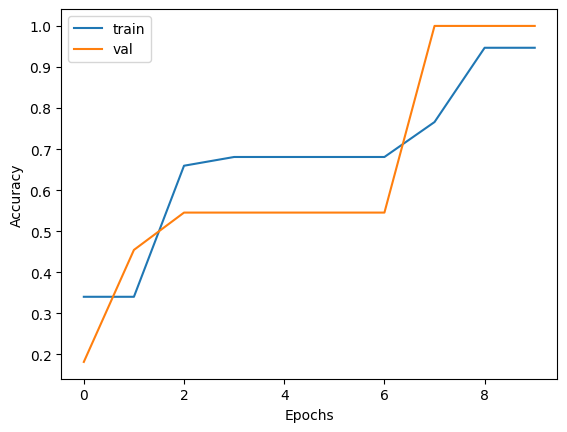

In [26]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

In [27]:
import tensorflow as tf
bm = tf.keras.models.load_model('iris_flower.keras') # highest accuracy value

In [28]:
y_pred = bm.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


In [29]:
y_pred

array([[0.21310523, 0.39971694, 0.38717777],
       [0.48279622, 0.26779756, 0.2494062 ],
       [0.23732325, 0.40524036, 0.35743642],
       [0.48624876, 0.26687932, 0.246872  ],
       [0.2335186 , 0.4078262 , 0.35865512],
       [0.46845865, 0.2774575 , 0.25408378],
       [0.18967588, 0.38059887, 0.42972517],
       [0.15124372, 0.3835916 , 0.46516478],
       [0.5167604 , 0.25100702, 0.23223263],
       [0.23068136, 0.4026644 , 0.36665428],
       [0.18004166, 0.34614778, 0.47381046],
       [0.14203784, 0.36773938, 0.49022263],
       [0.22801603, 0.38199756, 0.38998643],
       [0.47556663, 0.27288002, 0.25155336],
       [0.1621639 , 0.36470935, 0.4731268 ],
       [0.12530214, 0.3785281 , 0.49616975],
       [0.45428383, 0.28589827, 0.2598179 ],
       [0.16954328, 0.38232562, 0.44813102],
       [0.19180106, 0.3623203 , 0.44587857],
       [0.26955774, 0.37452835, 0.35591382],
       [0.21691698, 0.40582904, 0.3772539 ],
       [0.24772942, 0.35122582, 0.40104467],
       [0.

In [30]:
y_pred_n = np.argmax(y_pred, axis=1).astype('int')

In [31]:
unique_elements, counts = np.unique(y_pred_n, return_counts=True)
print("Predicted Class Counts:")
for element, count in zip(unique_elements, counts):
    print(f"Class {element}: {count}")

Predicted Class Counts:
Class 0: 16
Class 1: 12
Class 2: 17


In [32]:
accuracy_seq=accuracy_score(y_test, y_pred_n)
print(f"Accuracy of Sequential: {accuracy_seq}")

Accuracy of Sequential: 0.9333333333333333


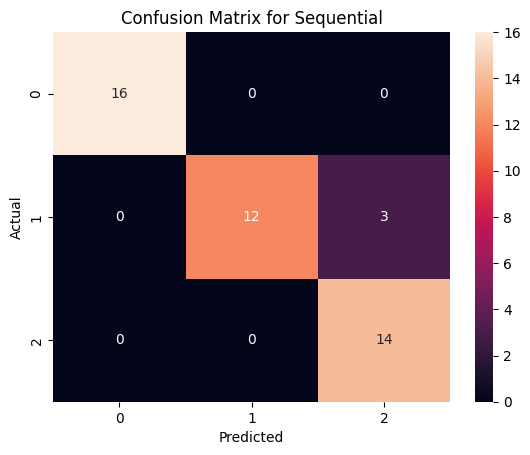

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred_n), annot=True, fmt='g')
plt.title('Confusion Matrix for Sequential')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Train and test MLPClassifier

In [34]:
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier model
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# Train the model
mlp_model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

Accuracy of MLPClassifier: 0.9555555555555556


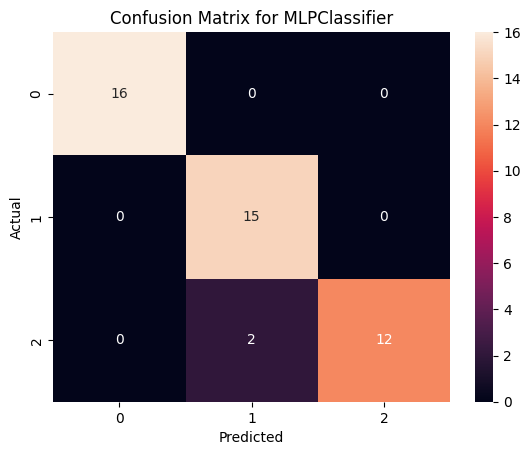

In [35]:
# Make predictions on the test set
y_pred_mlp = mlp_model.predict(x_test)

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy of MLPClassifier: {accuracy_mlp}")

# Display confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='g')
plt.title('Confusion Matrix for MLPClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Comparison between Sequential and MLPClassifier

In [36]:
# Import metrics if not already imported
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Sequential model prediction assumed as y_pred_n
# MLPClassifier prediction assumed as y_pred_mlp

# Evaluate Sequential
print("Sequential Model Classification Report:")
print(classification_report(y_test, y_pred_n))

# Evaluate MLPClassifier
print("MLPClassifier Classification Report:")
print(classification_report(y_test, y_pred_mlp))


Sequential Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89        15
           2       0.82      1.00      0.90        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.95      0.93      0.93        45

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      1.00      0.94        15
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [37]:
# Import metrics if not already imported
from sklearn.metrics import classification_report
import pandas as pd

# Sequential model prediction assumed as y_pred_n
# MLPClassifier prediction assumed as y_pred_mlp

# Get classification report for Sequential model
report_seq = classification_report(y_test, y_pred_n, output_dict=True)
df_report_seq = pd.DataFrame(report_seq).transpose()

# Get classification report for MLPClassifier model
report_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)
df_report_mlp = pd.DataFrame(report_mlp).transpose()


print("Sequential Model Classification Report:")
display(df_report_seq)

print("\nMLPClassifier Classification Report:")
display(df_report_mlp)

Sequential Model Classification Report:


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,16.000000
1,1.000000,0.800000,0.888889,15.000000
2,0.823529,1.000000,0.903226,14.000000
accuracy,0.933333,0.933333,0.933333,0.933333
macro avg,0.941176,0.933333,0.930705,45.000000
weighted avg,0.945098,0.933333,0.932855,45.000000



MLPClassifier Classification Report:


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,16.000000
1,0.882353,1.000000,0.937500,15.000000
2,1.000000,0.857143,0.923077,14.000000
accuracy,0.955556,0.955556,0.955556,0.955556
macro avg,0.960784,0.952381,0.953526,45.000000
weighted avg,0.960784,0.955556,0.955235,45.000000


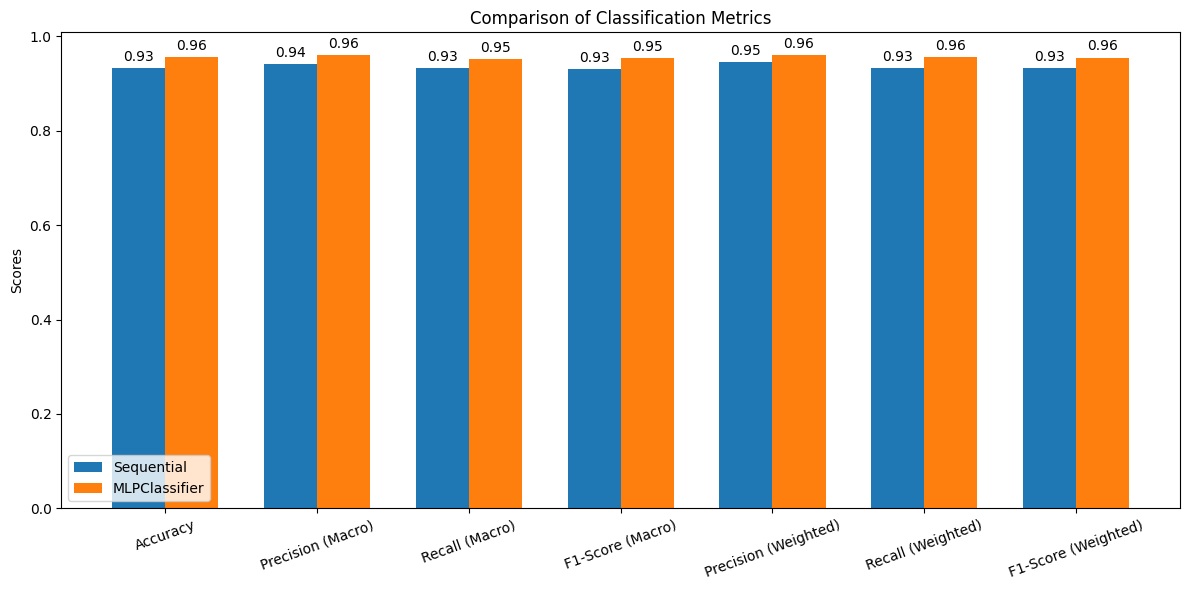

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score
)

# Calculate metrics
metrics = [
    'Accuracy',
    'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)',
    'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)'
]

# Sequential Model Scores
seq_accuracy = accuracy_score(y_test, y_pred_n)
seq_precision_macro = precision_score(y_test, y_pred_n, average='macro')
seq_recall_macro = recall_score(y_test, y_pred_n, average='macro')
seq_f1_macro = f1_score(y_test, y_pred_n, average='macro')

seq_precision_weighted = precision_score(y_test, y_pred_n, average='weighted')
seq_recall_weighted = recall_score(y_test, y_pred_n, average='weighted')
seq_f1_weighted = f1_score(y_test, y_pred_n, average='weighted')

sequential_scores = [
    seq_accuracy,
    seq_precision_macro, seq_recall_macro, seq_f1_macro,
    seq_precision_weighted, seq_recall_weighted, seq_f1_weighted
]

# MLPClassifier Scores
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_precision_macro = precision_score(y_test, y_pred_mlp, average='macro')
mlp_recall_macro = recall_score(y_test, y_pred_mlp, average='macro')
mlp_f1_macro = f1_score(y_test, y_pred_mlp, average='macro')

mlp_precision_weighted = precision_score(y_test, y_pred_mlp, average='weighted')
mlp_recall_weighted = recall_score(y_test, y_pred_mlp, average='weighted')
mlp_f1_weighted = f1_score(y_test, y_pred_mlp, average='weighted')

mlp_scores = [
    mlp_accuracy,
    mlp_precision_macro, mlp_recall_macro, mlp_f1_macro,
    mlp_precision_weighted, mlp_recall_weighted, mlp_f1_weighted
]

# Plotting
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, sequential_scores, width, label='Sequential')
bars2 = ax.bar(x + width/2, mlp_scores, width, label='MLPClassifier')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=20)
ax.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()
